In [1]:
%matplotlib inline
import networkx as nx
import itertools

## 割当問題

In [2]:
# 問題のデータ
oasis_labels = ['A', 'B', 'C']
person_labels = [1, 2, 3, 4, 5, 6, 7, 8]
dist = [[3, 2, 1, 3, 4, 2, 4, 1],
        [1, 1, 1, 5, 1, 1, 2, 3],
        [2, 4, 4, 2, 4, 2, 1, 2]]
upper_bound = [3, 3, 4]
limit = 3

In [3]:
# ネットワークの作成
G1 = nx.DiGraph()
G1.add_nodes_from(oasis_labels)
G1.add_nodes_from(person_labels)
G1.add_nodes_from(['source', 'target'])
for i in range(len(oasis_labels)):
    for j in range(len(person_labels)):
        if dist[i][j] < limit:
            G1.add_edge(person_labels[j], oasis_labels[i], capacity = 1)
for i in range(len(oasis_labels)):
    G1.add_edge(oasis_labels[i], 'target', capacity = upper_bound[i])
for j in range(len(person_labels)):
    G1.add_edge('source', person_labels[j], capacity = 1)

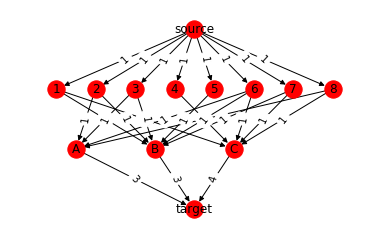

In [4]:
# ネットワークの描画
mypos1 = {}
l = max(len(oasis_labels), len(person_labels))
mypos1['source'] = (0, 30)
mypos1['target'] = (0, 0)
for i in range(len(oasis_labels)):
    mypos1[oasis_labels[i]] =  ((i+0.5)*(l/len(oasis_labels))*2-l, 10)
for j in range(len(person_labels)):
    mypos1[person_labels[j]] = ((j+0.5)*(l/len(person_labels))*2-l, 20)
cap1 = {}
for e in G1.edges():
    cap1[e] = G1.get_edge_data(*e)['capacity']
nx.draw(G1, pos = mypos1, edge_labels = nx.draw_networkx_edge_labels(G1, pos = mypos1, edge_labels = cap1), with_labels = True)

In [5]:
# 最大流を計算する
f1 = nx.maximum_flow(G1, 'source', 'target')
print(f1)

(8, {'A': {'target': 3}, 1: {'C': 1, 'B': 0}, 'C': {'target': 4}, 'B': {'target': 1}, 4: {'C': 1}, 5: {'B': 1}, 6: {'A': 1, 'C': 0, 'B': 0}, 7: {'C': 1, 'B': 0}, 8: {'A': 0, 'C': 1}, 2: {'A': 1, 'B': 0}, 'source': {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1}, 3: {'A': 1, 'B': 0}, 'target': {}})


In [6]:
# 最大流を描画するための準備
G1f = nx.DiGraph()
G1f.add_nodes_from(oasis_labels)
G1f.add_nodes_from(person_labels)
G1f.add_nodes_from(['source', 'target'])
for v in f1[1].keys():
    for u in f1[1][v]:
        if f1[1][v][u] != 0:
            G1f.add_edge(v, u, flow = f1[1][v][u])

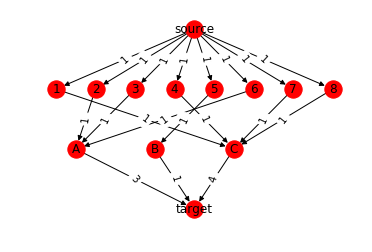

In [7]:
# 最大流の描画
cap1f = {}
for e in G1f.edges():
    cap1f[e] = G1f.get_edge_data(*e)['flow']
nx.draw(G1f, pos = mypos1, edge_labels = nx.draw_networkx_edge_labels(G1f, pos = mypos1, edge_labels = cap1f), with_labels = True)

## リーグ戦における優勝可能性判定問題

In [8]:
# 問題のデータ
teams = ['NYY', 'BAL', 'BOS', 'TOR', 'DET']
win  = [75, 71, 69, 63, 49]
loss = [59, 63, 66, 72, 86]
gl   = [28, 28, 27, 27, 27] # games left
table = [ [0, 3, 8, 7, 3, 7],
          [3, 0, 2, 7, 4, 12],
          [8, 2, 0, 0, 0, 17],
          [7, 7, 0, 0, 0, 13],
          [3, 4, 0, 0, 0, 20] ]

In [9]:
# 優勝可能性を判定すチーム名
target = 'DET'

In [10]:
# ネットワークの作成
G2 = nx.DiGraph()
teams_left = list(teams)
teams_left.remove(target)
teams_left_pairs = []
target_win = win[teams.index(target)] + sum(table[teams.index(target)])
for p in itertools.combinations(teams_left, 2):
    teams_left_pairs.append(p)
G2.add_nodes_from(teams_left)
G2.add_nodes_from(teams_left_pairs)
G2.add_nodes_from(['source', 'target'])
for t in teams_left:
    for p in teams_left_pairs:
        if t in p:
            G2.add_edge(p, t, capacity = float("inf"))
for t in teams_left:
    G2.add_edge(t, 'target', capacity = target_win-win[teams.index(t)])
for p in teams_left_pairs:
    G2.add_edge('source', p, capacity = table[teams.index(p[0])][teams.index(p[1])])

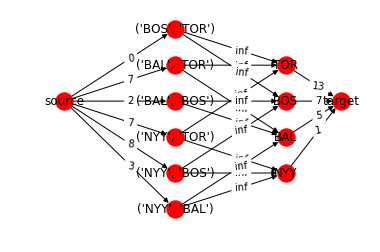

In [11]:
# ネットワークの描画
mypos2 = {}
l2 = len(teams_left_pairs)
mypos2['source'] = (0, 0)
mypos2['target'] = (300, 0)
for i in range(len(teams_left)):
    mypos2[teams_left[i]] = (240, i*10 - len(teams_left)*5)
for j in range(len(teams_left_pairs)):
    mypos2[teams_left_pairs[j]] = (120, j*10 - len(teams_left_pairs)*5)
cap2 = {}
for e in G2.edges():
    cap2[e] = G2.get_edge_data(*e)['capacity']
nx.draw(G2, pos = mypos2, edge_labels = nx.draw_networkx_edge_labels(G2, pos = mypos2, label_pos = 0.4, edge_labels = cap2), with_labels = True)

In [12]:
# 最大流を計算する
f2 = nx.maximum_flow(G2, 'source', 'target')
print(f2)

(26, {'NYY': {'target': 1}, 'target': {}, ('BAL', 'TOR'): {'TOR': 7, 'BAL': 0}, 'TOR': {'target': 13}, 'BOS': {'target': 7}, ('NYY', 'BOS'): {'NYY': 0, 'BOS': 7}, ('NYY', 'TOR'): {'TOR': 6, 'NYY': 1}, 'source': {('BOS', 'TOR'): 0, ('NYY', 'BOS'): 7, ('NYY', 'TOR'): 7, ('BAL', 'TOR'): 7, ('BAL', 'BOS'): 2, ('NYY', 'BAL'): 3}, ('BAL', 'BOS'): {'BAL': 2, 'BOS': 0}, ('BOS', 'TOR'): {'TOR': 0, 'BOS': 0}, 'BAL': {'target': 5}, ('NYY', 'BAL'): {'BAL': 3, 'NYY': 0}})


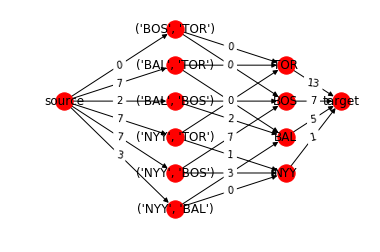

In [13]:
# 最大流を描画するための準備
G2f = nx.DiGraph()
G2.add_nodes_from(teams_left)
G2.add_nodes_from(teams_left_pairs)
G2.add_nodes_from(['source', 'target'])
for v in f2[1].keys():
    for u in f2[1][v]:
        G2f.add_edge(v, u, flow = f2[1][v][u])

cap2f = {}
for e in G2f.edges():
    cap2f[e] = G2f.get_edge_data(*e)['flow']
nx.draw(G2f, pos = mypos2, edge_labels = nx.draw_networkx_edge_labels(G2f, pos = mypos2, edge_labels = cap2f), with_labels = True)